# Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load the dataset
file_path = 'timestamp.csv'
df = pd.read_csv(file_path)
display(df.head())

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start Date,Start Time,End Date,End Time
0,Marigold,166,134,Cloudy,High-End Customers,22244,4448.8,284,7,9.0,2023-05-21,11:44:42,2023-05-22,13:44:42
1,Gerbera,113,178,Sunny,Temple,20114,4022.8,242,10,6.0,2023-05-12,07:19:11,2023-05-13,15:19:11
2,Carnation,168,152,Windy,Temple,25536,5107.2,283,6,6.0,2023-12-02,02:09:50,2023-12-02,03:09:50
3,Chrysanthemum,142,24,Rainy,Special Events,3408,681.6,269,5,8.0,2023-07-24,07:47:39,2023-07-25,18:47:39
4,Carnation,155,198,Sunny,Corporate Events,30690,6138.0,283,10,7.0,2023-10-03,14:15:51,2023-10-04,07:15:51


In [4]:
# Basic info about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flower Name             5000 non-null   object 
 1   MRP (₹)                 5000 non-null   int64  
 2   Qty Sold (kg)           5000 non-null   int64  
 3   Weather                 5000 non-null   object 
 4   Customer Segment        5000 non-null   object 
 5   Revenue                 5000 non-null   int64  
 6   Profit Margin           5000 non-null   float64
 7   Sale Frequency          5000 non-null   int64  
 8   Weather Impact Score    5000 non-null   int64  
 9   Customer Segment Score  2220 non-null   float64
 10  Start Date              5000 non-null   object 
 11  Start Time              5000 non-null   object 
 12  End Date                5000 non-null   object 
 13  End Time                5000 non-null   object 
dtypes: float64(2), int

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Flower Name                  0
MRP (₹)                      0
Qty Sold (kg)                0
Weather                      0
Customer Segment             0
Revenue                      0
Profit Margin                0
Sale Frequency               0
Weather Impact Score         0
Customer Segment Score    2780
Start Date                   0
Start Time                   0
End Date                     0
End Time                     0
dtype: int64


In [7]:
# Fill missing values in 'Customer Segment Score' with median
df['Customer Segment Score'] = df['Customer Segment Score'].fillna(df['Customer Segment Score'].median())

In [8]:
df.isnull().sum()

Flower Name               0
MRP (₹)                   0
Qty Sold (kg)             0
Weather                   0
Customer Segment          0
Revenue                   0
Profit Margin             0
Sale Frequency            0
Weather Impact Score      0
Customer Segment Score    0
Start Date                0
Start Time                0
End Date                  0
End Time                  0
dtype: int64

In [9]:
# Combine Start Date and Start Time into a single datetime column
df['Start DateTime'] = pd.to_datetime(df['Start Date'] + ' ' + df['Start Time'])
df['End DateTime'] = pd.to_datetime(df['End Date'] + ' ' + df['End Time'])

In [10]:
df.head()

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start Date,Start Time,End Date,End Time,Start DateTime,End DateTime
0,Marigold,166,134,Cloudy,High-End Customers,22244,4448.8,284,7,9.0,2023-05-21,11:44:42,2023-05-22,13:44:42,2023-05-21 11:44:42,2023-05-22 13:44:42
1,Gerbera,113,178,Sunny,Temple,20114,4022.8,242,10,6.0,2023-05-12,07:19:11,2023-05-13,15:19:11,2023-05-12 07:19:11,2023-05-13 15:19:11
2,Carnation,168,152,Windy,Temple,25536,5107.2,283,6,6.0,2023-12-02,02:09:50,2023-12-02,03:09:50,2023-12-02 02:09:50,2023-12-02 03:09:50
3,Chrysanthemum,142,24,Rainy,Special Events,3408,681.6,269,5,8.0,2023-07-24,07:47:39,2023-07-25,18:47:39,2023-07-24 07:47:39,2023-07-25 18:47:39
4,Carnation,155,198,Sunny,Corporate Events,30690,6138.0,283,10,7.0,2023-10-03,14:15:51,2023-10-04,07:15:51,2023-10-03 14:15:51,2023-10-04 07:15:51


In [11]:
# Drop original date and time columns
df.drop(['Start Date', 'Start Time', 'End Date', 'End Time'], axis=1, inplace=True)

In [12]:
df.head()

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start DateTime,End DateTime
0,Marigold,166,134,Cloudy,High-End Customers,22244,4448.8,284,7,9.0,2023-05-21 11:44:42,2023-05-22 13:44:42
1,Gerbera,113,178,Sunny,Temple,20114,4022.8,242,10,6.0,2023-05-12 07:19:11,2023-05-13 15:19:11
2,Carnation,168,152,Windy,Temple,25536,5107.2,283,6,6.0,2023-12-02 02:09:50,2023-12-02 03:09:50
3,Chrysanthemum,142,24,Rainy,Special Events,3408,681.6,269,5,8.0,2023-07-24 07:47:39,2023-07-25 18:47:39
4,Carnation,155,198,Sunny,Corporate Events,30690,6138.0,283,10,7.0,2023-10-03 14:15:51,2023-10-04 07:15:51


In [13]:
# Step 1: Encoding Categorical Variables
# One-Hot Encoding for 'Weather' and 'Customer Segment'
df_encoded = pd.get_dummies(df, columns=['Weather', 'Customer Segment'], drop_first=True)

# Label Encoding for 'Flower Name' (since there are multiple categories)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Flower Name'] = le.fit_transform(df['Flower Name'])

In [14]:
df.head()

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start DateTime,End DateTime
0,Marigold,166,134,Cloudy,High-End Customers,22244,4448.8,284,7,9.0,2023-05-21 11:44:42,2023-05-22 13:44:42
1,Gerbera,113,178,Sunny,Temple,20114,4022.8,242,10,6.0,2023-05-12 07:19:11,2023-05-13 15:19:11
2,Carnation,168,152,Windy,Temple,25536,5107.2,283,6,6.0,2023-12-02 02:09:50,2023-12-02 03:09:50
3,Chrysanthemum,142,24,Rainy,Special Events,3408,681.6,269,5,8.0,2023-07-24 07:47:39,2023-07-25 18:47:39
4,Carnation,155,198,Sunny,Corporate Events,30690,6138.0,283,10,7.0,2023-10-03 14:15:51,2023-10-04 07:15:51


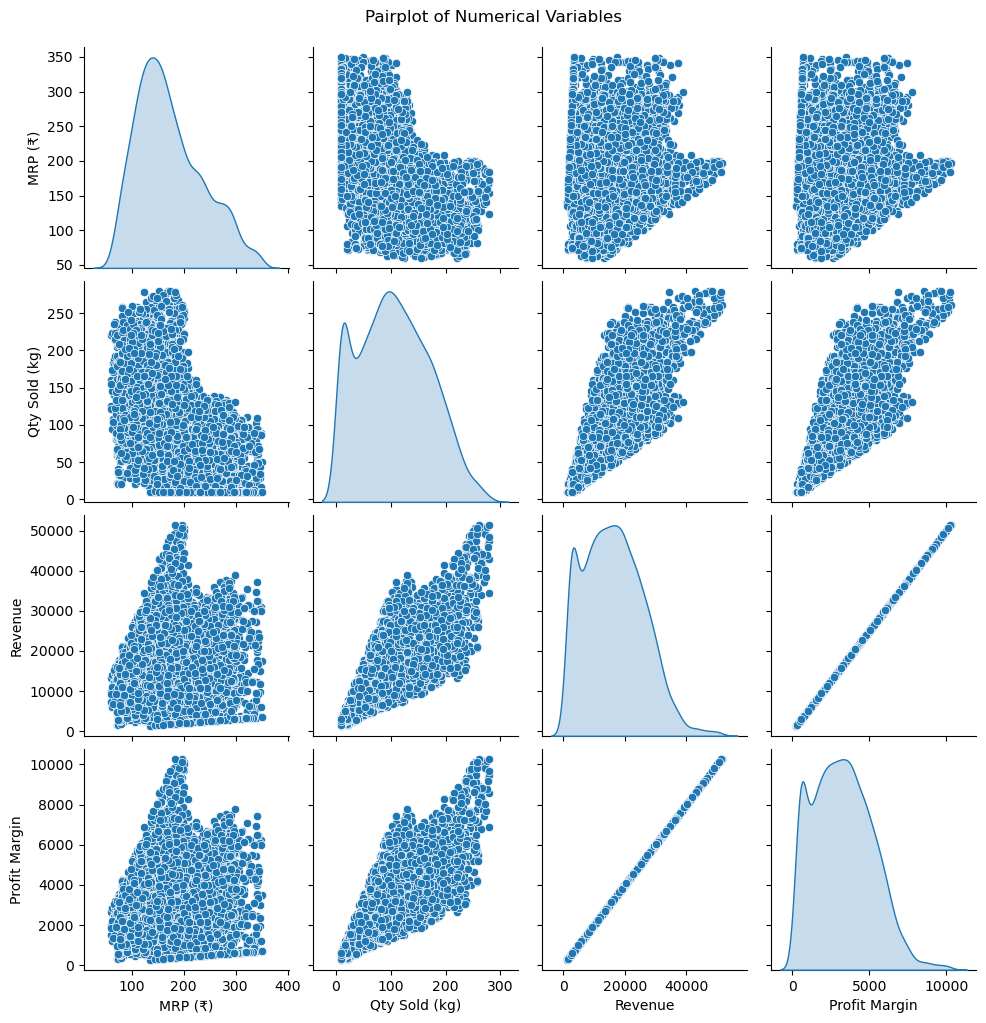

In [15]:
# Step 2: Visualization for Numerical Data
# Pairplot for understanding relationships between numerical variables
sns.pairplot(df, vars=['MRP (₹)', 'Qty Sold (kg)', 'Revenue', 'Profit Margin'], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

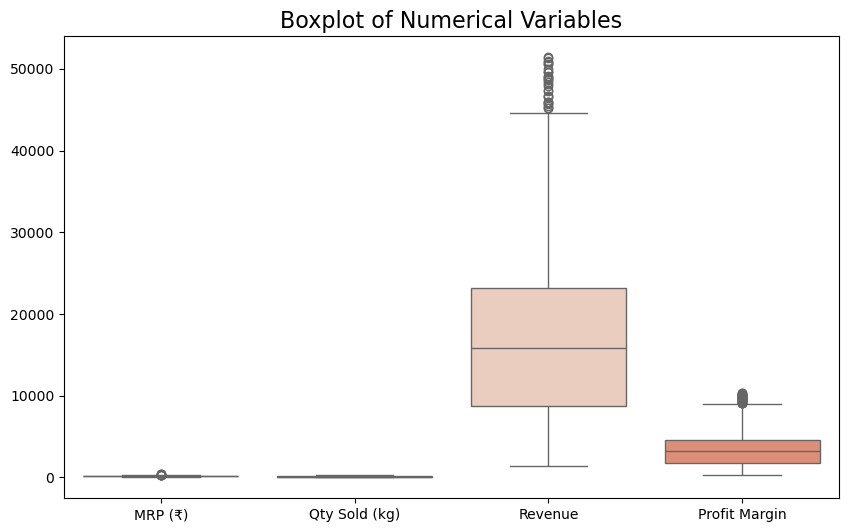

In [16]:
# Boxplot to visualize distribution and outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MRP (₹)', 'Qty Sold (kg)', 'Revenue', 'Profit Margin']], palette='coolwarm')
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.show()

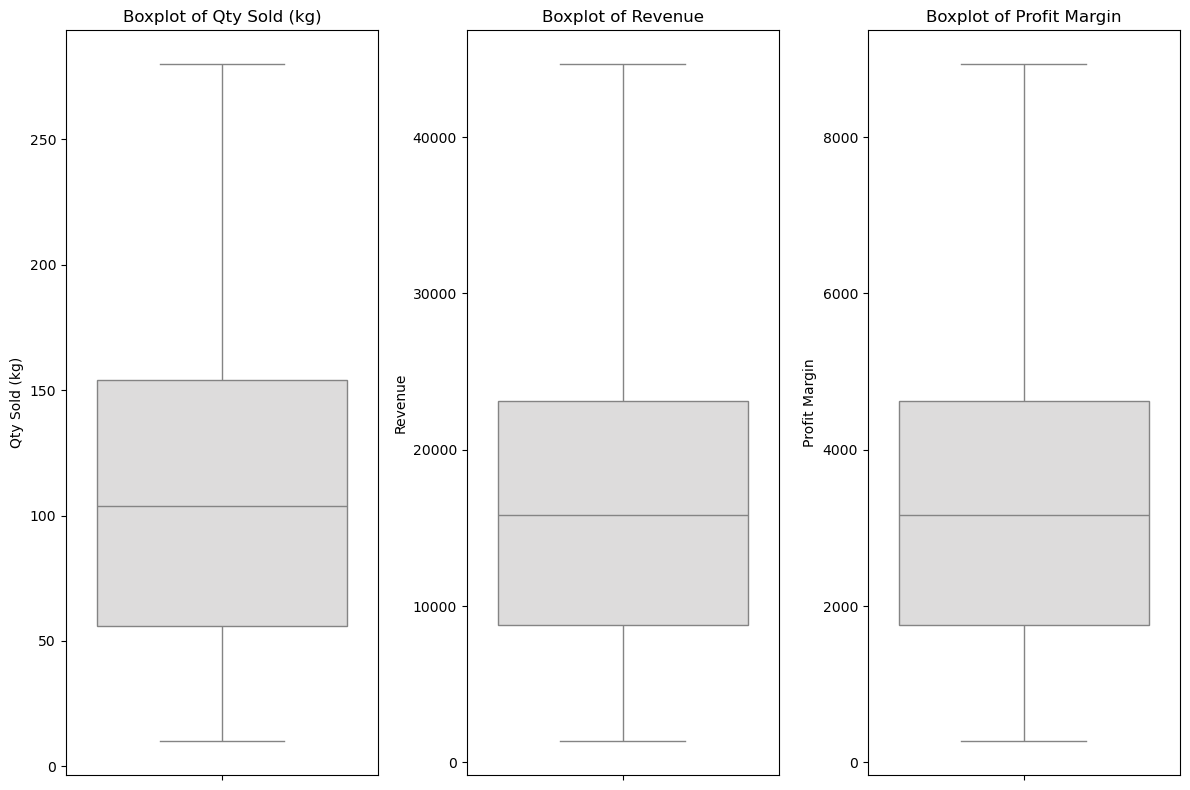

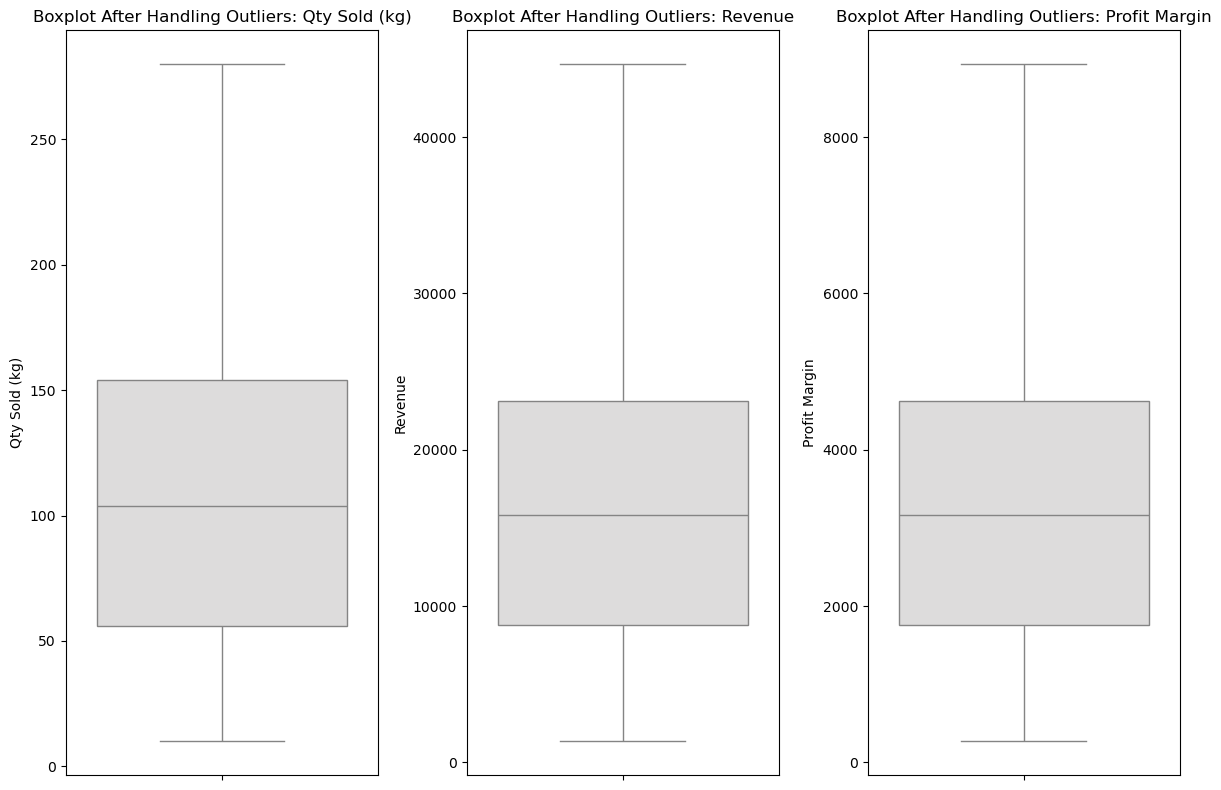

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Step 1: Detect Outliers using IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First Quartile
    Q3 = data[column].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers for 'Qty Sold (kg)', 'Revenue', and 'Profit Margin'
columns_to_check = ['Qty Sold (kg)', 'Revenue', 'Profit Margin']
outliers = {col: detect_outliers_iqr(df, col) for col in columns_to_check}

# Step 2: Visualize Outliers with Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], palette='coolwarm')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 3: Handle Outliers - Option 1: Cap/Floor Outliers
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])  # Cap lower
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])  # Cap upper

# Step 4: Recheck Distribution After Outlier Handling
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], palette='coolwarm')
    plt.title(f'Boxplot After Handling Outliers: {col}')
plt.tight_layout()
plt.show()

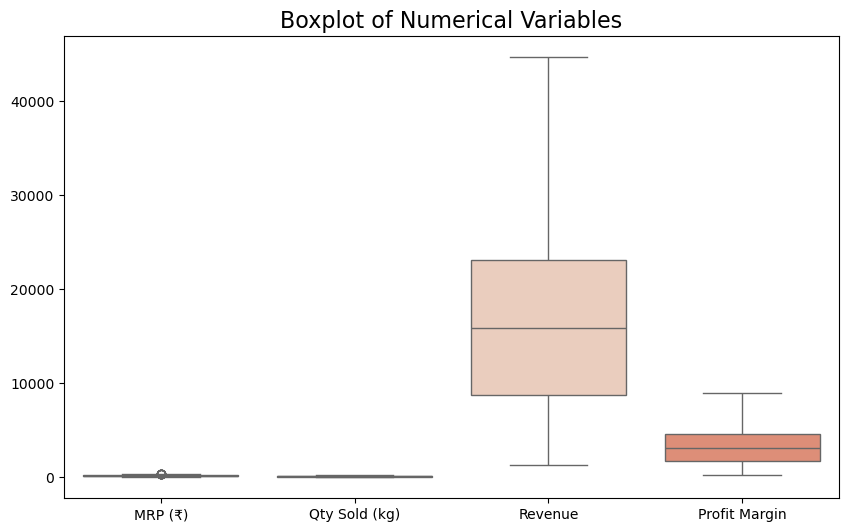

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MRP (₹)', 'Qty Sold (kg)', 'Revenue', 'Profit Margin']], palette='coolwarm')
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.show()

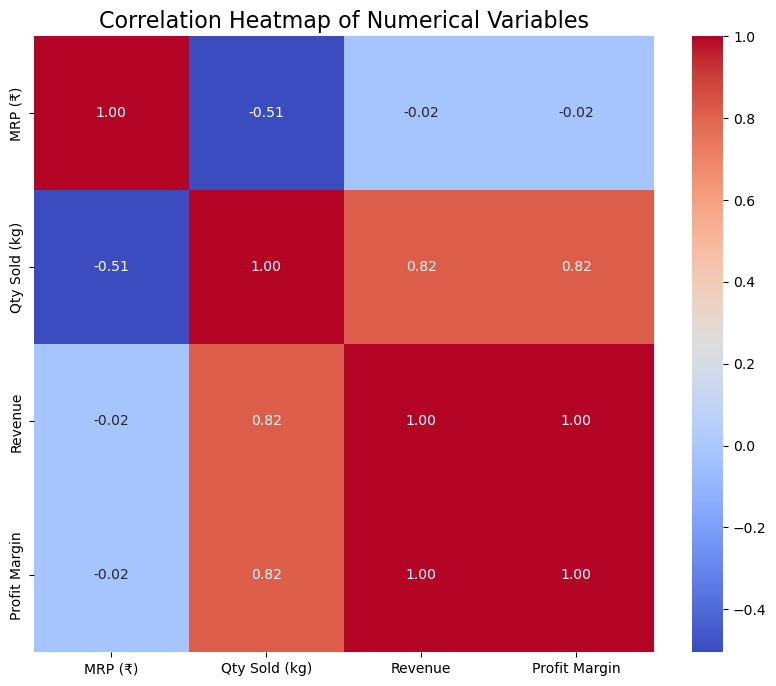

In [21]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[['MRP (₹)', 'Qty Sold (kg)', 'Revenue', 'Profit Margin']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

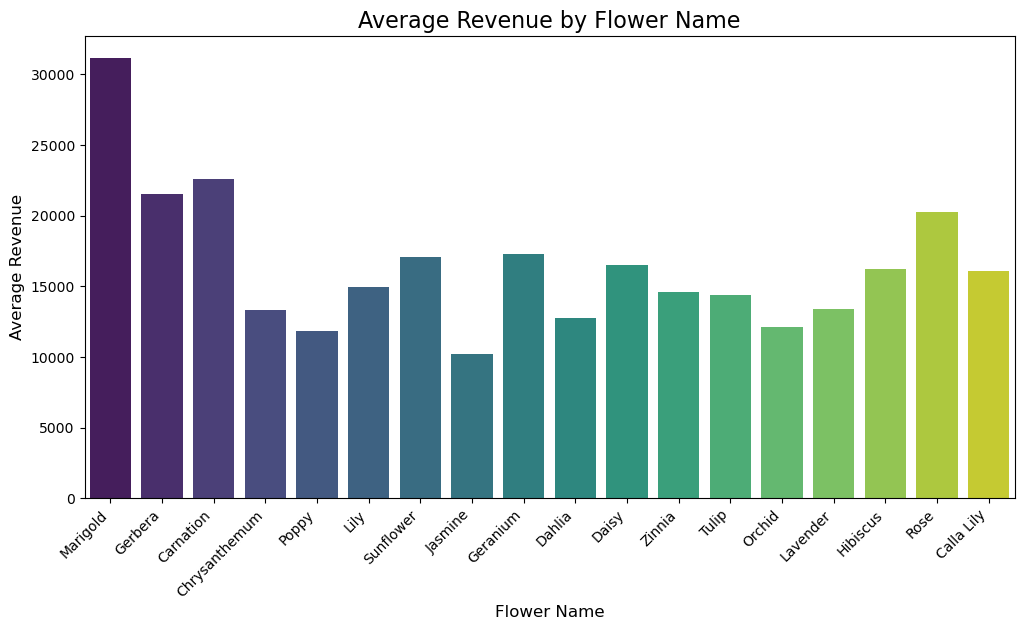

In [22]:
# Barplot of Revenue by Flower Name
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Flower Name', y='Revenue', estimator='mean', ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Revenue by Flower Name', fontsize=16)
plt.xlabel('Flower Name', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.show()

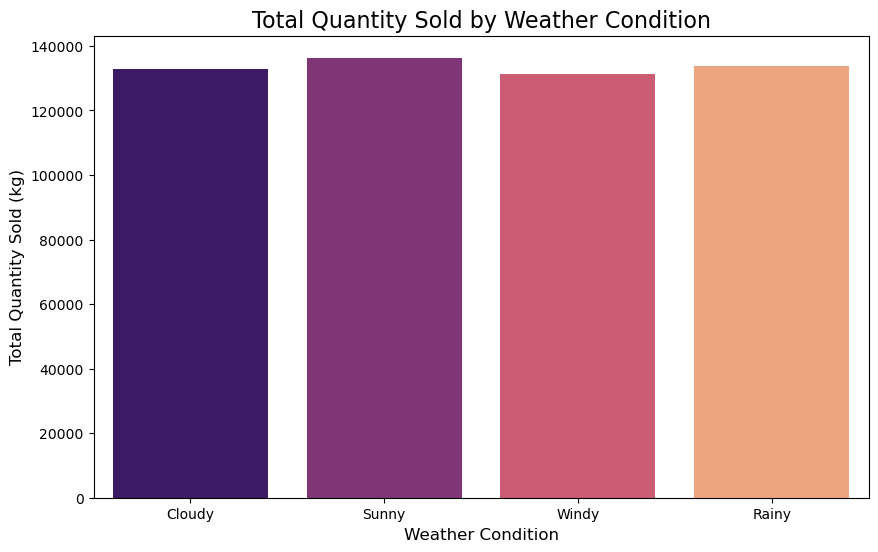

In [23]:
# Sales Trend by Weather
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Weather', y='Qty Sold (kg)', estimator='sum', ci=None, palette='magma')
plt.title('Total Quantity Sold by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Quantity Sold (kg)', fontsize=12)
plt.show()

In [24]:
# Feature Engineering: Add new features
# 1. Demand based on 'Qty Sold (kg)'
def calculate_demand(row):
    if row['Qty Sold (kg)'] > df['Qty Sold (kg)'].quantile(0.75):
        return 'High'
    elif row['Qty Sold (kg)'] > df['Qty Sold (kg)'].quantile(0.50):
        return 'Medium'
    else:
        return 'Low'

df['Demand'] = df.apply(calculate_demand, axis=1)

# 2. Sales Duration
df['Sales Duration (hours)'] = (df['End DateTime'] - df['Start DateTime']).dt.total_seconds() / 3600

# 3. Profit Percentage
df['Profit Percentage'] = (df['Profit Margin'] / df['Revenue']) * 100

In [25]:
df.head()

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start DateTime,End DateTime,Demand,Sales Duration (hours),Profit Percentage
0,Marigold,166,134.0,Cloudy,High-End Customers,22244.0,4448.8,284,7,9.0,2023-05-21 11:44:42,2023-05-22 13:44:42,Medium,26.0,20.0
1,Gerbera,113,178.0,Sunny,Temple,20114.0,4022.8,242,10,6.0,2023-05-12 07:19:11,2023-05-13 15:19:11,High,32.0,20.0
2,Carnation,168,152.0,Windy,Temple,25536.0,5107.2,283,6,6.0,2023-12-02 02:09:50,2023-12-02 03:09:50,Medium,1.0,20.0
3,Chrysanthemum,142,24.0,Rainy,Special Events,3408.0,681.6,269,5,8.0,2023-07-24 07:47:39,2023-07-25 18:47:39,Low,35.0,20.0
4,Carnation,155,198.0,Sunny,Corporate Events,30690.0,6138.0,283,10,7.0,2023-10-03 14:15:51,2023-10-04 07:15:51,High,17.0,20.0


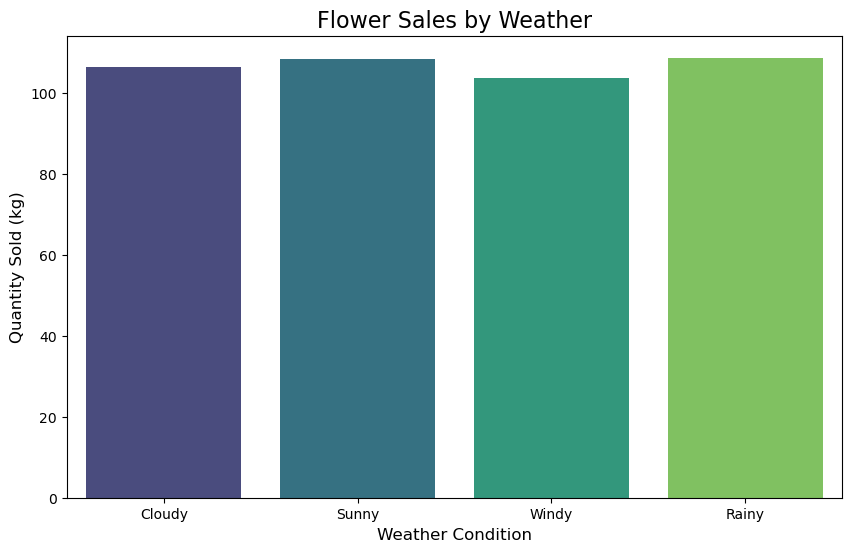

In [26]:
# EDA: Visualizations and correlations
# Bar chart of flower sales by weather
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Weather', y='Qty Sold (kg)', ci=None, palette='viridis')
plt.title('Flower Sales by Weather', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Quantity Sold (kg)', fontsize=12)
plt.show()

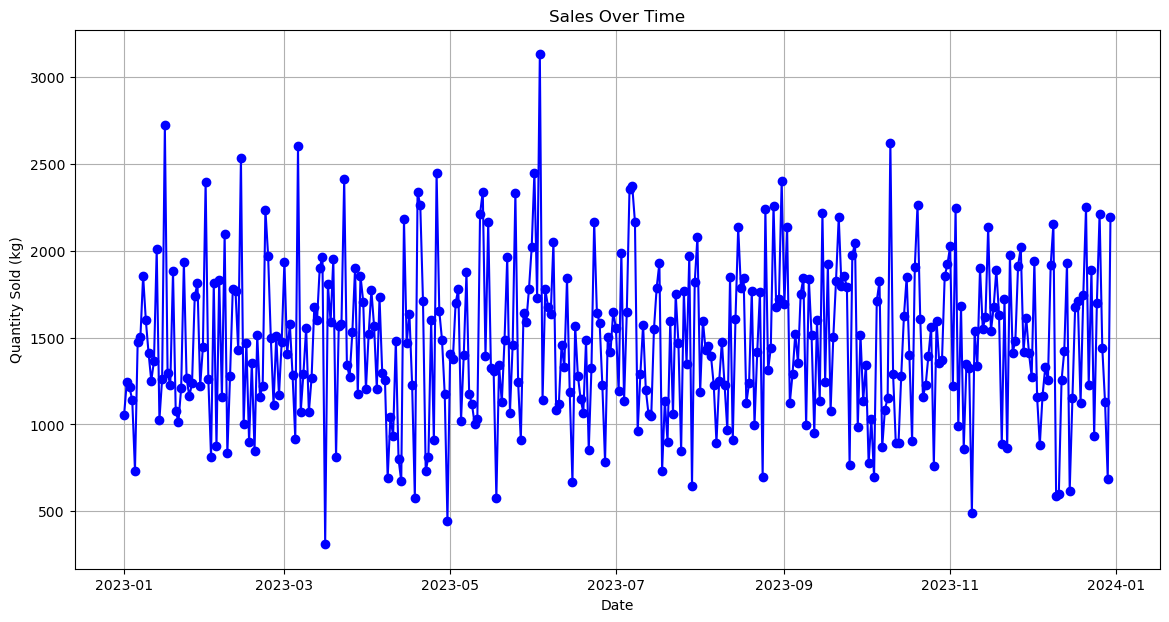

In [27]:
# Sales over time
plt.figure(figsize=(14, 7))
sales_over_time = df.groupby(df['Start DateTime'].dt.date)['Qty Sold (kg)'].sum()
sales_over_time.plot(kind='line', marker='o', color='b', title='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold (kg)')
plt.grid()
plt.show()

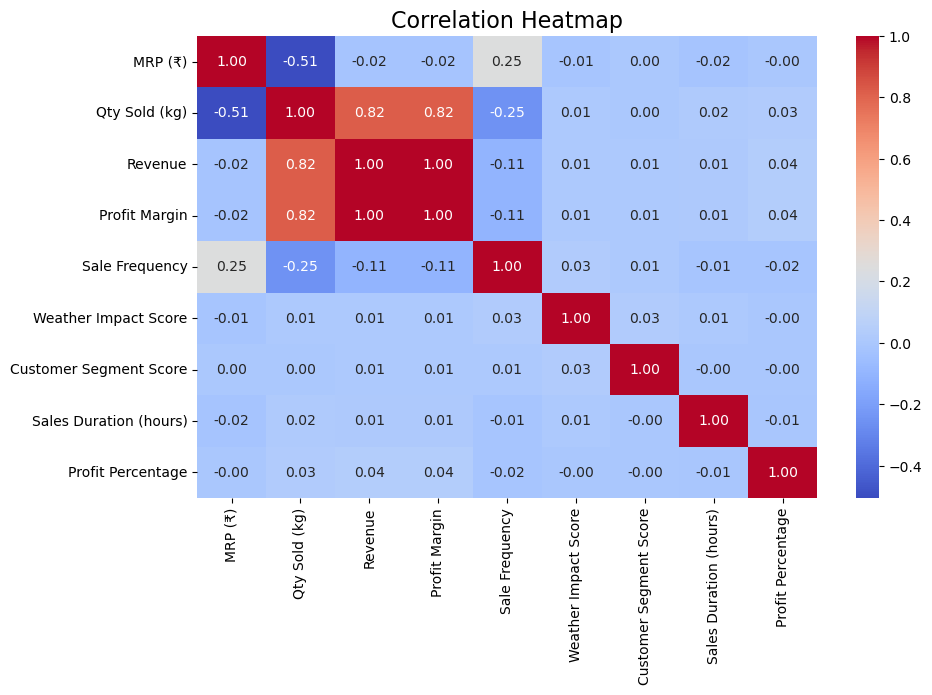

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [29]:
# Save the cleaned dataset
df.to_csv('flowers_dataset_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'flowers_dataset_cleaned.csv'.")


Cleaned dataset saved as 'flowers_dataset_cleaned.csv'.


In [30]:
df1 = pd.read_csv("flowers_dataset_cleaned.csv")
df1.head()

,Flower Name,MRP (₹),Qty Sold (kg),Weather,Customer Segment,Revenue,Profit Margin,Sale Frequency,Weather Impact Score,Customer Segment Score,Start DateTime,End DateTime,Demand,Sales Duration (hours),Profit Percentage
0,Marigold,166,134.0,Cloudy,High-End Customers,22244.0,4448.8,284,7,9.0,2023-05-21 11:44:42,2023-05-22 13:44:42,Medium,26.0,20.0
1,Gerbera,113,178.0,Sunny,Temple,20114.0,4022.8,242,10,6.0,2023-05-12 07:19:11,2023-05-13 15:19:11,High,32.0,20.0
2,Carnation,168,152.0,Windy,Temple,25536.0,5107.2,283,6,6.0,2023-12-02 02:09:50,2023-12-02 03:09:50,Medium,1.0,20.0
3,Chrysanthemum,142,24.0,Rainy,Special Events,3408.0,681.6,269,5,8.0,2023-07-24 07:47:39,2023-07-25 18:47:39,Low,35.0,20.0
4,Carnation,155,198.0,Sunny,Corporate Events,30690.0,6138.0,283,10,7.0,2023-10-03 14:15:51,2023-10-04 07:15:51,High,17.0,20.0
